#### Riley Payung, Jae Jeong, Hilina Gebre
#### Jason Kinser
#### CDS 411
#### 10/03/2020
<center style="font-size: 18px;">Project 2</center>

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
import time

import sys
import schelling

In [2]:
def Unhappy(grid,delta=0.1):
    V,H = grid.shape
    ans = np.zeros((V,H),int)
    #topleft
    ans[:-1,:-1] += (abs(grid[1:,1:]-grid[:-1,:-1]) > delta)*(grid[1:,1:]!=0.0).astype(int)
    #above
    ans[:-1,:] += (abs(grid[1:,:]-grid[:-1,:]) > delta)*(grid[1:,:]!=0.0).astype(int)
    #topright
    ans[:-1,1:] += (abs(grid[1:,:-1]-grid[:-1,1:]) > delta)*(grid[1:,:-1]!=0.0).astype(int)
    #right
    ans[:,1:] += (abs(grid[:,:-1]-grid[:,1:]) > delta)*(grid[:,:-1]!=0.0).astype(int)
    #left
    ans[:,:-1] += (abs(grid[:,1:]-grid[:,:-1]) > delta)*(grid[:,1:]!=0.0).astype(int)
    #bottomright
    ans[1:,:-1] += (abs(grid[:-1,1:]-grid[1:,:-1]) > delta)*(grid[:-1,1:]!=0.0).astype(int)
    #below
    ans[1:,:] += (abs(grid[:-1,:]-grid[1:,:]) > delta)*(grid[:-1,:]!=0.0).astype(int)
    #bottomleft
    ans[1:,1:] += (abs(grid[:-1,:-1]-grid[1:,1:]) > delta)*(grid[1:,1:]!=0.0).astype(int)
    ans *= (grid != 0.0)
    return ans

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

def Init(x,y,pctempty):
    emptycellcount = int(x * y * pctempty);
    #print(emptycellcount)
    grid = np.random.random((x,y));
    
    for i in range(emptycellcount):
        rand1 = np.random.randint(0,x);
        rand2 = np.random.randint(0,y);
        while (grid[rand1,rand2] == 0.0):
            rand1 = np.random.randint(0,x);
            rand2 = np.random.randint(0,y);
        grid[rand1,rand2]=0;
    return grid;

In [4]:
def CollectGrumps(uhap, gamma=5):
    mask = uhap>=gamma
    v,h = mask.nonzero()
    return v,h

def FindEmpty(grid):
    ev,eh = (grid==0.0).nonzero()
    return ev,eh

def Move1Unhappy(v,h,ev,eh,grid):
    N = len(v)
    if N>0:
        me = np.random.randint(0,N)
        mover = v[me],h[me]
        M = len(ev)
        me = np.random.randint(0,M)
        newloc = ev[me],eh[me]
        # move
        grid[newloc] = grid[mover]
        grid[mover] = 0

In [5]:
def Iterate(grid,gamma,delta):
    u = Unhappy(grid,delta)
    v,h = CollectGrumps(u,gamma)
    ev,eh = FindEmpty(grid)
    Move1Unhappy(v,h,ev,eh,grid)

In [71]:
def Go(V,H,pctempty,interval,N,delta,gamma):
    grid = Init(V,H,pctempty)
    u = Unhappy(grid,delta)
    SegregationScore = (1-(u>=gamma).sum()/(V*H))*100
    print(f"Iteration: 0 , Segregation Score: {SegregationScore:.2f}%")
    plt.imshow(grid,cmap="gray");
    plt.show()
    for i in range(interval):
        for j in range(N):
            Iterate(grid,gamma,delta)
        u = Unhappy(grid,delta)
        SegregationScore2 = (1-(u>=gamma).sum()/(V*H))*100
        print(f"Iteration: {N*(i+1)} , Segregation Score: {SegregationScore2:.2f}%")
        #imageio.imsave('dud'+str(i) + '.png',(100*grid).astype(np.uint8))
        
        plt.imshow(grid,cmap="gray");
        plt.show()
    return grid, SegregationScore, SegregationScore2,

In [50]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
def surfplot(grid):
    X = np.arange(0,100)
    Y = np.arange(0,100)
    x,y = np.meshgrid(X,Y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # your code to create data: creating x, y, and z data.
    z = grid[x,y]
    surf = ax.plot_surface(x,y,z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()

#surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

In [65]:
N = [1000,10000,20000,30000,40000,50000]
for i in range(len(N)):
    t1=time.time();
    grid,score1,score2 = Go(100,100,0.01,5,N[i],0.2,4)
    t2=time.time();
    timediff = t2-t1
    print(f"For {5*N[i]} Iterations: {timediff:.2f} Seconds to compute")

For 5000 Iterations: 3.15 Seconds to compute
For 50000 Iterations: 31.51 Seconds to compute
For 100000 Iterations: 61.79 Seconds to compute
For 150000 Iterations: 92.22 Seconds to compute
For 200000 Iterations: 120.29 Seconds to compute
For 250000 Iterations: 149.65 Seconds to compute


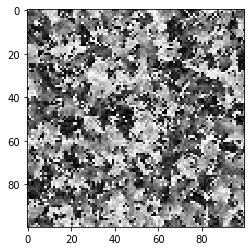

Percent:0.01 Score_Before:15.88% Score_After:65.62%


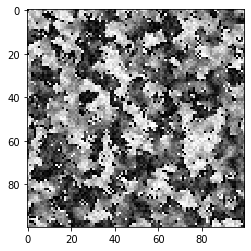

Percent:0.05 Score_Before:21.49% Score_After:84.48%


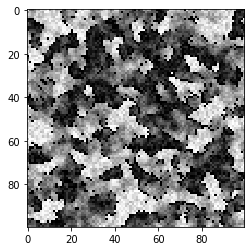

Percent:0.1 Score_Before:30.38% Score_After:100.00%


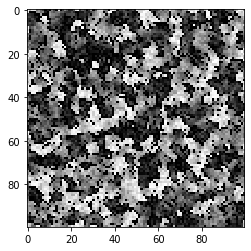

Percent:0.2 Score_Before:45.92% Score_After:100.00%


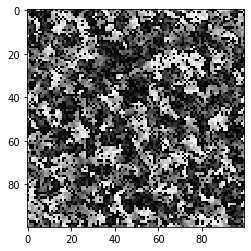

Percent:0.3 Score_Before:60.01% Score_After:100.00%


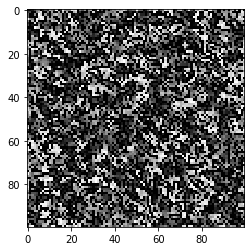

Percent:0.4 Score_Before:73.99% Score_After:100.00%


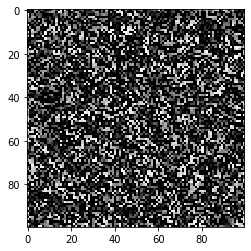

Percent:0.5 Score_Before:84.16% Score_After:100.00%


In [67]:
averagetime = []
emptypercent = [0.01,0.05,0.10,0.20,0.30,0.40,0.50]
for i in range(len(emptypercent)):
    t1=time.time();
    grid,score1,score2 = Go(100,100,emptypercent[i],5,10000,0.2,4)
    plt.imshow(grid,cmap="gray");
    plt.show()
    print(f"Percent:{emptypercent[i]} Score_Before:{score1:.2f}% Score_After:{score2:.2f}%")
    t2=time.time();
    difference = (t2-t1)
    averagetime.append(difference)
#timeoverall = np.mean(averagetime)
#print(f"Average Computation Time: {timeoverall:.2f} Secs")

Iteration: 0 , Segregation Score: 15.13%


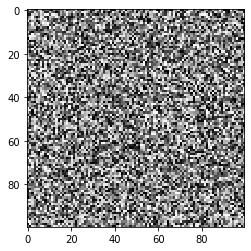

Iteration: 20000 , Segregation Score: 40.89%


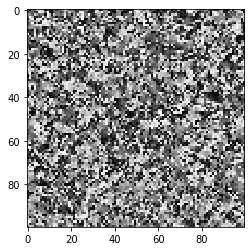

Iteration: 40000 , Segregation Score: 55.75%


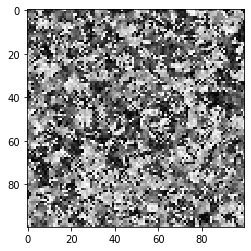

Iteration: 60000 , Segregation Score: 68.76%


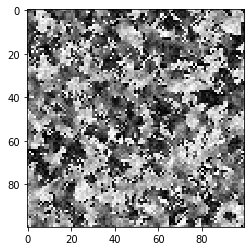

Iteration: 80000 , Segregation Score: 80.04%


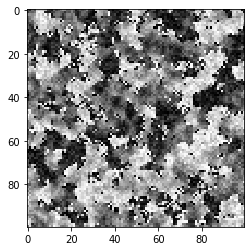

Iteration: 100000 , Segregation Score: 87.01%


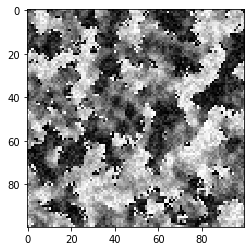

In [73]:
grid,score1,score2 = Go(100,100,0.01,5,20000,0.2,4)
#plt.imshow(grid,cmap="gray");
#plt.show()
#print(score1," ",score2)

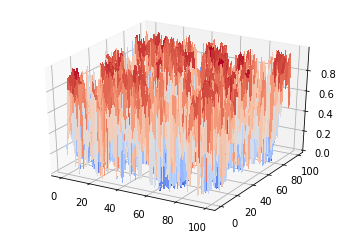

In [74]:
surfplot(grid)

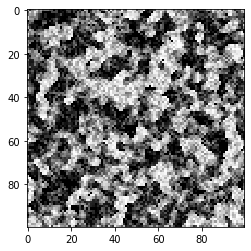

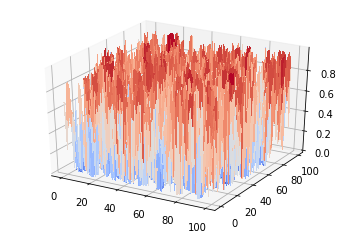

64.82   100.0
41.91195559501648


In [70]:
t1=time.time();
grid,score1,score2 = Go(100,100,0.1,5,20000,0.3,5)
plt.imshow(grid,cmap="gray");
plt.show()
surfplot(grid)
print(score1," ",score2)
t2=time.time();
print(t2-t1)

1000
Iteration: 0 , Segregation Score: 14.00%


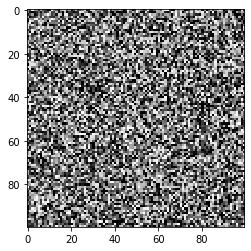

Iteration: 150000 , Segregation Score: 18.30%


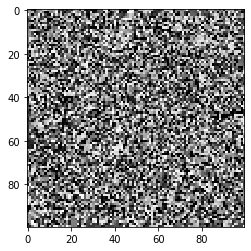

Iteration: 300000 , Segregation Score: 18.47%


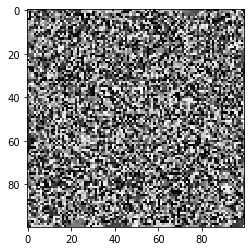

Iteration: 450000 , Segregation Score: 19.75%


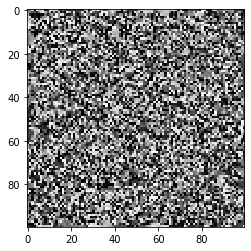

Iteration: 600000 , Segregation Score: 19.66%


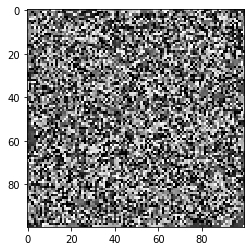

Iteration: 750000 , Segregation Score: 20.02%


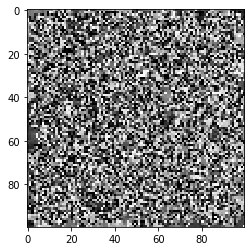

Iteration: 900000 , Segregation Score: 20.03%


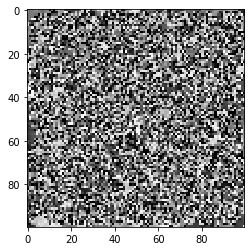

Iteration: 1050000 , Segregation Score: 19.74%


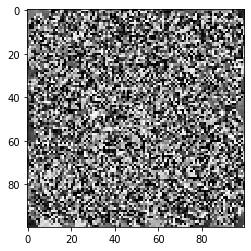

Iteration: 1200000 , Segregation Score: 20.65%


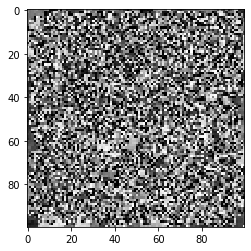

Iteration: 1350000 , Segregation Score: 20.20%


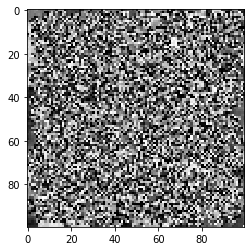

Iteration: 1500000 , Segregation Score: 20.28%


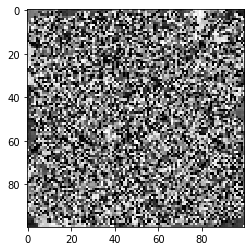

In [199]:
Go(100,100,0.10,10,150000,0.1,4)